<a href="https://colab.research.google.com/github/vienskaz/DigitHandWriting-NN/blob/main/HandWritingToText.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import of libraries**




In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# **Getting dataset**



In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


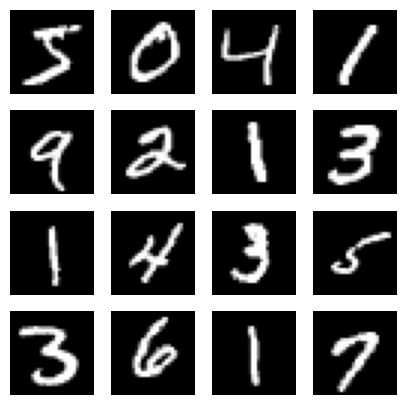

In [4]:
plt.figure(figsize=(5, 5))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

# **Normalization**

In [5]:
x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

# **Model of NN**




In [6]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# **Training of model**

In [8]:
model.fit(x_train,y_train,epochs=4)
model.save("handwritten")

Epoch 1/4
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2680 - accuracy: 0.9217
Epoch 2/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1070 - accuracy: 0.9670
Epoch 3/4
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0730 - accuracy: 0.9778
Epoch 4/4
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0543 - accuracy: 0.9823


In [9]:
loss, accuracy=model.evaluate(x_test,y_test)
print(f'Loss={loss}')
print(f'{accuracy * 100:.2f}%')

313/313 [==============================] - 1s 2ms/step - loss: 0.0982 - accuracy: 0.9707
Loss=0.09820560365915298
97.07%


# **Confusion Matrix**

1875/1875 [==============================] - 3s 1ms/step
tf.Tensor(
[[5912    0    1    0    0    1    3    3    3    0]
 [   1 6700   10    3    1    1    2   16    7    1]
 [  11    3 5810   24    8    5    6   70   20    1]
 [   7    1    8 6003    1   43    3   28   20   17]
 [   6    8    4    0 5783    0   10   14    1   16]
 [   6    0    1    9    2 5367   15    2   16    3]
 [  12    4    5    0    1   16 5869    0   11    0]
 [   1    2    2    1    1    1    0 6255    0    2]
 [   8   13    2    9    2    4    4   15 5782   12]
 [  17    6    0    9   69   11    1   47    8 5781]], shape=(10, 10), dtype=int32)


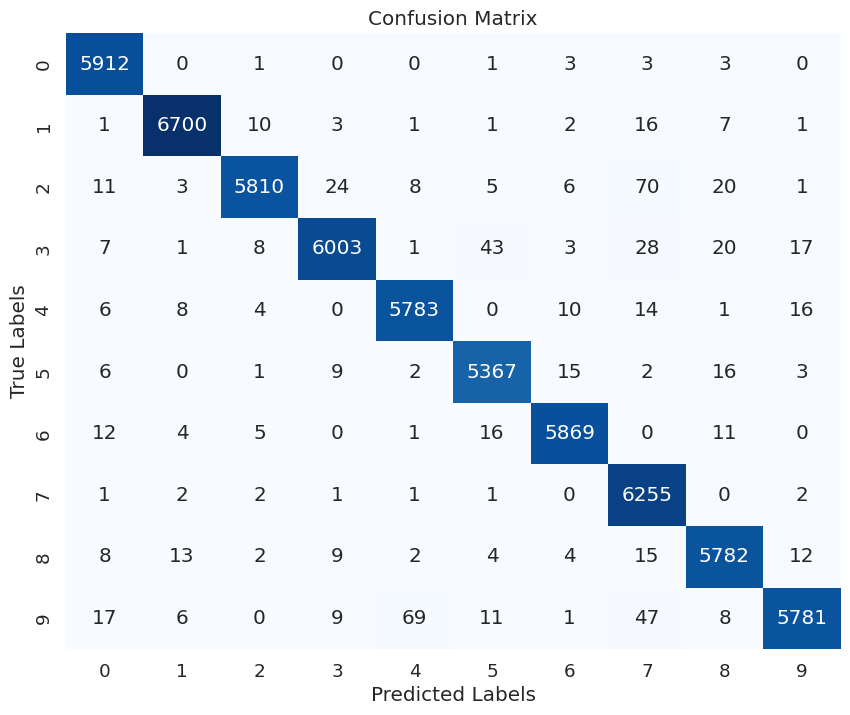

In [10]:
y_pred = model.predict(x_train)
y_pred_classes = tf.argmax(y_pred, axis=1)

confusion_matrix = tf.math.confusion_matrix(y_train, y_pred_classes)
print(confusion_matrix)



plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


plt.show()

In [ ]:
img=cv2.imread('image3.png')[:,:,0]
img=np.invert(np.array([img]))

1/1 [==============================] - 0s 36ms/step
Number can be
3


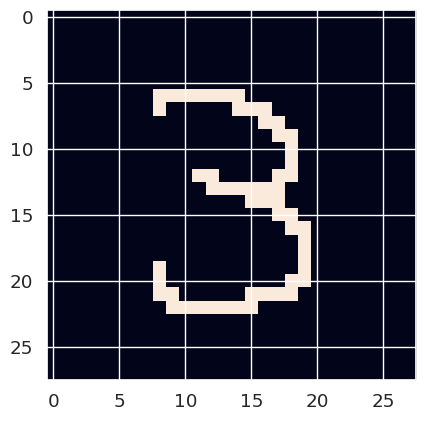

In [ ]:
prediction=model.predict(img)
print("Number can be")
print(np.argmax(prediction))
plt.imshow(img[0])